<a href="https://colab.research.google.com/github/Christelleelkhoury/AAI614_-ElKhoury-/blob/main/Week%203/Notebook3.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 3.2: Practice with Data Cleaning*


In [1]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

Exercise I. Load the following datafile from GitHub

In [2]:
grads = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI614/main/Week%203/grads.csv")

In [3]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,$40k
1,Jerry,35,3.5,Columbia,5.0,$80k
2,Elaine,55,4.0,Columbia,4.2,$60k
3,Cosmo,5,2.0,City College,2.0,$25k
4,Newman,25,2.8,City College,0.0,$50k
5,Frank,35,3.0,Festivus Uni,NaN,$40k
6,Estelle,100,3.2,Festivus Uni,1.7,$0k
7,Leo,15,2.4,Festivus Uni,0.0,$35k
8,Rachel,50,4.0,Columbia,NaN,$75k


Question 1: Identify all the outliers in the above data.  Justify your answers using objective measures.

The methods to find outliers are:
1. Visualizing with a boxplot from Matplotlib.
2. Using the 1.5 IQR rule.

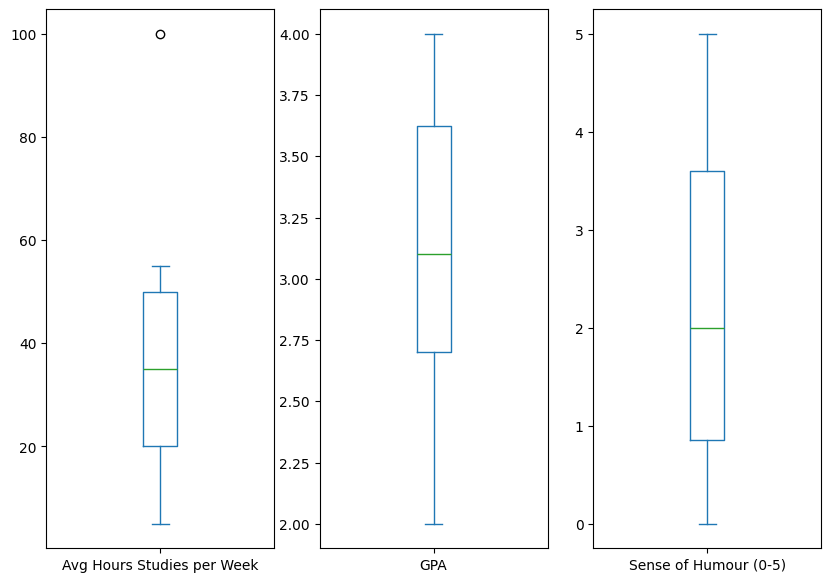

In [4]:
import matplotlib.pyplot as plt

grads.plot(kind = 'box', subplots = True, figsize = (10, 7))
plt.show()

In [9]:
#create iqr function to find the outliers values in a column which will return the column name and the value of the outlier
def iqr(col):
  Q1 = col.quantile(0.25)
  Q3 = col.quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  outliers = {}

  for value in col:
    if value < lower_bound or value > upper_bound:
      outliers[col.name] = value
  return outliers

outliers_hours_studies = outliers['Avg Hours Studies per Week']
outliers_hours_studies

NameError: name 'outliers' is not defined

Question 2: There are various data that are missing.  Fill-in the missing data or delete the rows/columns that you think you should delete.  Justify your answer

In [10]:
grads.isnull().sum()

,0
Student Name,0
Avg Hours Studies per Week,0
GPA,1
University,0
Sense of Humour (0-5),2
Salary,0


In [12]:
# Calculate the mean for GPA and Sense of Humour
mean_GPA = grads['GPA'].mean()
mean_soh = grads['Sense of Humour (0-5)'].mean()

# Fill missing values with the mean
grads['GPA'] = grads['GPA'].fillna(mean_GPA)
grads['Sense of Humour (0-5)'] = grads['Sense of Humour (0-5)'].fillna(mean_soh)


In [13]:
grads.isnull().sum()

,0
Student Name,0
Avg Hours Studies per Week,0
GPA,0
University,0
Sense of Humour (0-5),0
Salary,0


Question 3: Reload the data and fill-in the data using mean method as well as the frequent method.

In [14]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,3.1125,NYU,3.000000,$40k
1,Jerry,35,3.5000,Columbia,5.000000,$80k
2,Elaine,55,4.0000,Columbia,4.200000,$60k
3,Cosmo,5,2.0000,City College,2.000000,$25k
4,Newman,25,2.8000,City College,0.000000,$50k
5,Frank,35,3.0000,Festivus Uni,2.271429,$40k
6,Estelle,100,3.2000,Festivus Uni,1.700000,$0k
7,Leo,15,2.4000,Festivus Uni,0.000000,$35k
8,Rachel,50,4.0000,Columbia,2.271429,$75k


In [15]:
grads = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI614/main/Week%203/grads.csv")
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,$40k
1,Jerry,35,3.5,Columbia,5.0,$80k
2,Elaine,55,4.0,Columbia,4.2,$60k
3,Cosmo,5,2.0,City College,2.0,$25k
4,Newman,25,2.8,City College,0.0,$50k
5,Frank,35,3.0,Festivus Uni,NaN,$40k
6,Estelle,100,3.2,Festivus Uni,1.7,$0k
7,Leo,15,2.4,Festivus Uni,0.0,$35k
8,Rachel,50,4.0,Columbia,NaN,$75k


In [17]:
# Calculate the mode for Sense of Humour and fill missing values
mode_soh = grads['Sense of Humour (0-5)'].mode()[0]
grads['Sense of Humour (0-5)'] = grads['Sense of Humour (0-5)'].fillna(mode_soh)

# For GPA, it might make more sense to use the median instead of the mean
median_GPA = grads['GPA'].median()
grads['GPA'] = grads['GPA'].fillna(median_GPA)

grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,3.1,NYU,3.0,$40k
1,Jerry,35,3.5,Columbia,5.0,$80k
2,Elaine,55,4.0,Columbia,4.2,$60k
3,Cosmo,5,2.0,City College,2.0,$25k
4,Newman,25,2.8,City College,0.0,$50k
5,Frank,35,3.0,Festivus Uni,0.0,$40k
6,Estelle,100,3.2,Festivus Uni,1.7,$0k
7,Leo,15,2.4,Festivus Uni,0.0,$35k
8,Rachel,50,4.0,Columbia,0.0,$75k


Exercise II. Run the cell below to create a new dataframe called `df_miss`.  Its first column will contain some missing values.

In [ ]:
import pandas as pd
import numpy as np
import random

nrows = 10
ncols = 5

# set a seed for random number generation
np.random.seed(314)
# create an array filled with random data
data = np.array(np.random.rand(nrows, ncols))
# put the data to a pandas dataframe
df_miss = pd.DataFrame(data)
# rename the columns
df_miss.columns = ['col_'+str(ii) for ii in range(ncols)]

# randomly set some values to missing
ix0 = np.random.randint(nrows, size=3)
ix1 = np.random.randint(nrows, size=3)

df_miss['col_0'][ix0] = np.nan
df_miss['col_1'][ix1] = np.nan

print(df_miss)

Impute the missing values (NaN) in `col_0` (but not `col_1`) with the median.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

Impute the missing values in `col_1` with value 0.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.